In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import time
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
bcw_train = pd.read_csv(os.path.join('/content/drive/MyDrive/Datasets/SI_final_project', 'bcw_train.csv'))
bcw_test = pd.read_csv(os.path.join('/content/drive/MyDrive/Datasets/SI_final_project', 'bcw_test.csv'))
model_metrics = pd.read_csv(os.path.join('/content/drive/MyDrive/Datasets/SI_final_project', 'model_metrics.csv'))

MessageError: ignored

In [ ]:
"""
models:

gnb = GaussianNB()

knn_best = KNeighborsClassifier(n_neighbors=9)

dtree_best = DecisionTreeClassifier(criterion='entropy', max_depth=8)

svc_best = SVC(C=1, kernel='linear')

mlp = MLPClassifier(hidden_layer_sizes=(20, 20), batch_size=50,
                    learning_rate_init=1e-3, learning_rate='constant',
                    shuffle=True, solver='adam', alpha=1e-2, random_state=42)

"""

'\nmodels:\n'

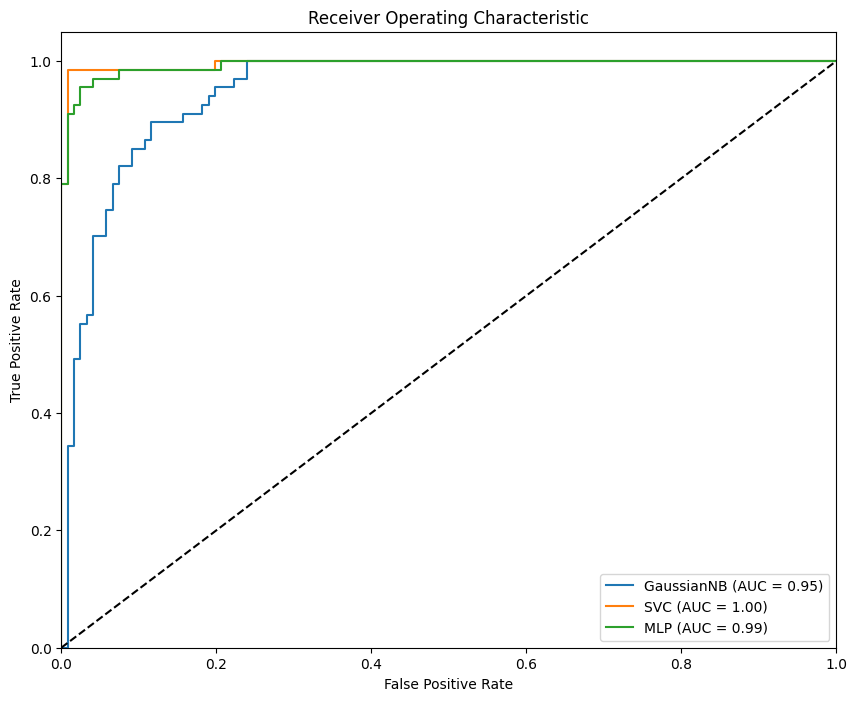

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc




X_train, X_test, y_train, y_test = bcw_train.drop('target', axis=1), bcw_test.drop('target', axis=1), bcw_train['target'], bcw_test['target']

gnb = GaussianNB()
svc_best = SVC(C=1, kernel='linear', probability=True)
mlp = MLPClassifier(hidden_layer_sizes=(20, 20), batch_size=50,
                    learning_rate_init=1e-3, learning_rate='constant',
                    shuffle=True, solver='adam', alpha=1e-2, random_state=42)

# Train models and calculate ROC curves
models = [gnb, svc_best, mlp]
labels = ['GaussianNB', 'SVC', 'MLP']
plt.figure(figsize=(10, 8))

for model, label in zip(models, labels):
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print(model_metrics.to_latex(index=True,
                  float_format="{:.3f}".format,
))

\begin{tabular}{lrrrrl}
\toprule
{} &  Accuracy &  Precision &  Recall &  F1-Score &  Model \\
\midrule
0 &     0.883 &      0.883 &   0.821 &     0.833 &    GNB \\
1 &     0.936 &      0.936 &   0.881 &     0.908 &    KNN \\
2 &     0.904 &      0.904 &   0.881 &     0.868 &  DTREE \\
3 &     0.979 &      0.979 &   0.985 &     0.971 &    SVM \\
4 &     1.000 &      1.000 &   1.000 &     1.000 &    MLP \\
\bottomrule
\end{tabular}



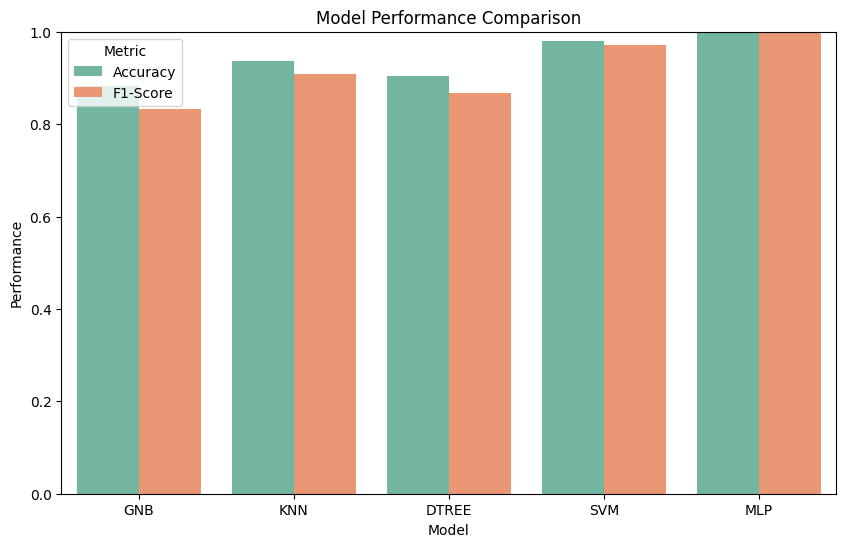

In [ ]:
new_df = model_metrics.drop(['Precision', 'Recall'], axis=1)

# Melt data frame
melted_data = pd.melt(new_df, id_vars=['Model'], var_name='Metric', value_name='Performance')

# Plot data
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Performance", hue="Metric", data=melted_data, palette="Set2")
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()